# Association Rule Mining (ARM)

## Introduction

Association rule mining is used to discover interesting connections hidden in large data sets, and the discovered patterns are usually represented in the form of association rules or frequent itemsets.

Association rules reflect the interdependence and association between one thing and other things.

If there is a certain association between two or more things, then the occurrence of one of them can predict the occurrence of other things associated with it.

Association rule mining is used for knowledge discovery, not prediction, so it is an unsupervised machine learning algorithm.


## Theory

Here we first talk about some definitions related to ARM.

1. Itemset
   
   A set that contains zero or more items, or a k-item set if it contains k items.

    For example, if a customer buys a bag of items, then the bag of items is an item set, and each item in it is an item.

2. Transaction $T$ and Transaction Set $D$

    A transaction $T$ is an item set, and each transaction $T$ is associated with a unique identifier $T_id$.

    The different transactions together form the transaction set $D$s, which constitutes the number of transaction databases discovered by the association rules.


    In the above example, a bag of goods per customer (all goods put into one bag) is a transaction, so in terms of each bag unit, the sales volume for the day is a transaction set.

3. Support count
   
   The number of transactions containing a specific set of items is denoted by the symbol $\sigma$, e.g. $\sigma({milk,beer,bread})=2$, which means that there are 2 purchases of these 3 items at the same time today.

4. Support
   
   is the ratio of the number of transactions containing a particular set of items to the total number of transactions, and is denoted by the symbol $s$, e.g. $s({milk,beer,bread})=2/5$, indicating that 2/5 customers bought all 3 items at once today.

5. Frequent itemset
   
   Refers to the set of all items that satisfy the minimum support threshold (min_support).
   This minimum support threshold is given.

6. Confidence
   
   Confidence is the ratio of the number of transactions containing the specified ${Y,X}$ to the number of transactions containing ${Y}$ or ${X}$, denoted by the symbol $s$.

**Next we talk about the Apriori algorithm.**

A common algorithm for finding frequent item sets.

Apriori principles:

1. if an itemset is frequent, then all its subsets must also be frequent.

2. On the contrary, if an itemset is non-frequent, then all its supersets are also non-frequent.

There exists an itemset {A,B}, and the one containing it is the superset, such as {A,B,C}.
The usefulness of this principle is that if an itemset is found to be infrequent, its subsets or supersets can be cut out earlier to reduce the computational overhead.

Features of Apriori algorithm:

1. multiple scans of the database.

2. large size of candidate items.

3. large overhead of computing support.

The disadvantage of Apriori algorithm is that it needs to generate candidate items repeatedly, and if the number of items is relatively large, the number of candidate items will reach a combined explosive growth.

## Methods

Import packages

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
dt = pd.read_csv("clean_record_data.csv")

dt = dt.drop(columns=["Unnamed: 0"])
dt.head()

,Credit_Mix,Payment_of_Min_Amount,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,0,1,0,0,0
1,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,0,0,1,0,0
2,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,0,0,0,0,1
3,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,1,0,0,0,0
4,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,1,0,0,0,0


In [4]:
dt.columns

Index(['Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score', 'Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_pay

**Apriori Algorithm and One-Hot Encoding**

Apriori's algorithm transforms True/False or 1/0. So from the original data set, I chose some one-hot encoding variables with 1/0. The selected variables contain information of occupation and payment behaviour.

In [5]:
# select some one-hot encoding variables
sub = dt.drop(columns=['Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score', 'Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'])
sub.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object')

In [6]:
sub.head()

,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


**Applying Apriori and Resulting**

The next step is to create the Apriori Model. We can change all the parameters in the Apriori Model in the mlxtend package.

I will try to use minimum support parameters for this modeling.

For this, I set a min_support value with a threshold value of 0.5% and printed them on the screen as well.

In [7]:
df = apriori(sub, min_support = 0.005, use_colnames = True, verbose = 1)
df

/Users/wangshiyu/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 675 combinations | Sampling itemset size 3


,support,itemsets
0,0.062639,(Occupation_Accountant)
1,0.063753,(Occupation_Architect)
2,0.062424,(Occupation_Developer)
3,0.060870,(Occupation_Doctor)
4,0.063446,(Occupation_Engineer)
...,...,...
106,0.032730,(Payment_Behaviour_High_spent_Medium_value_pay...
107,0.014325,(Payment_Behaviour_High_spent_Small_value_paym...
108,0.013742,(Payment_Behaviour_Low_spent_Large_value_payme...
109,0.018170,(Payment_Behaviour_Low_spent_Medium_value_paym...


In [8]:
#Let's view our interpretation values using the Associan rule function.
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.001)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Payment_Behaviour_High_spent_Large_value_paym...,(Occupation_Accountant),0.137302,0.062639,0.008313,0.060545,0.966577,-0.000287,0.997772
1,(Occupation_Accountant),(Payment_Behaviour_High_spent_Large_value_paym...,0.062639,0.137302,0.008313,0.132713,0.966577,-0.000287,0.994709
2,(Payment_Behaviour_High_spent_Medium_value_pay...,(Occupation_Accountant),0.251189,0.062639,0.016156,0.064317,1.026786,0.000421,1.001793
3,(Occupation_Accountant),(Payment_Behaviour_High_spent_Medium_value_pay...,0.062639,0.251189,0.016156,0.257917,1.026786,0.000421,1.009067
4,(Payment_Behaviour_High_spent_Small_value_paym...,(Occupation_Accountant),0.113641,0.062639,0.007250,0.063793,1.018435,0.000131,1.001233
...,...,...,...,...,...,...,...,...,...
175,(Occupation_Writer),(Payment_Behaviour_Low_spent_Large_value_payme...,0.129388,0.104459,0.013742,0.106211,1.016775,0.000227,1.001961
176,(Payment_Behaviour_Low_spent_Medium_value_paym...,(Occupation_Writer),0.138590,0.129388,0.018170,0.131105,1.013273,0.000238,1.001977
177,(Occupation_Writer),(Payment_Behaviour_Low_spent_Medium_value_paym...,0.129388,0.138590,0.018170,0.140430,1.013273,0.000238,1.002140
178,(Occupation_Writer),(Payment_Behaviour_Low_spent_Small_value_payme...,0.129388,0.254819,0.032914,0.254386,0.998302,-0.000056,0.999420


Text(0.5, 1.0, 'Network visualization of ARM')

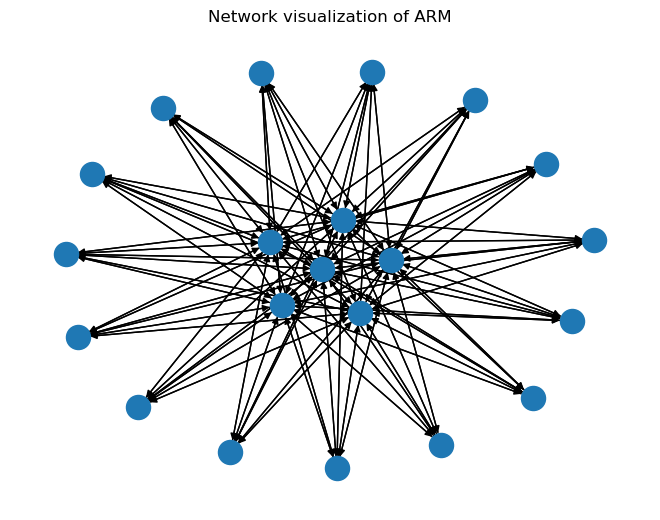

In [9]:
G = nx.from_pandas_edgelist(df_ar, 'antecedents', 'consequents', True, nx.DiGraph())
nx.draw(G)
plt.title('Network visualization of ARM')

## Result

**For example, if we examine our 1st index value;**

* The probability of the occupation of a person is accountant is 6%.
* High spent large value paymets is seen as 14%.
* We can say that the support of both accountant and high spent large value payments is measured as 0.8%.
* 13.3% of whose occupation is accountant is high spent large value payments.
* The correlation with each other is seen as 0.99.

## Conclusions

As a result, if an occupatio X and a payment behaviour

## References
https://en.wikipedia.org/wiki/Association_rule_learning

https://blogs.oracle.com/datascience/overview-of-traditional-machine-learning-techniques